## Setup

In [ ]:
from roboflow import Roboflow
from dotenv import load_dotenv
import os

env_path = r"C:\Users\SABIO\Documents\GitHub\Pool-Detection-CNN\.env"
load_dotenv(dotenv_path=env_path)
robo_token = os.getenv("ROBOFLOW_API_KEY")

rf = Roboflow(api_key=robo_token)


project = rf.workspace("spencer-kmi6v").project("pool-detect-cnn")
version = project.version(6)
dataset = version.download("yolov8-obb", location='../datasets/YOLO_OBBD')

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to ../datasets in yolov8-obb:: 100%|██████████| 590/590 [00:00<00:00, 1625.58it/s]


In [ ]:
!pip install "ultralytics<=8.3.40"

## Custom Training

In [3]:
from ultralytics import YOLO

model = YOLO("yolov8n-obb.pt")

results = model.train(data=f"{dataset.location}/data.yaml", epochs=100, imgsz=640, project='../models', name='obb/train')

100%|██████████| 6.26M/6.26M [00:00<00:00, 74.1MB/s]

New https://pypi.org/project/ultralytics/8.3.146 available  Update with 'pip install -U ultralytics'


Ultralytics 8.3.40  Python-3.9.1 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3060, 12287MiB)
engine\trainer: task=obb, mode=train, model=yolov8n-obb.pt, data=c:\Users\SABIO\Documents\GitHub\Pool-Detection-CNN\datasets/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=../models, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False,

100%|██████████| 5.35M/5.35M [00:00<00:00, 79.3MB/s]


AMP: checks passed 


train: Scanning C:\Users\SABIO\Documents\GitHub\Pool-Detection-CNN\datasets\train\labels... 202 images, 67 backgrounds, 0 corrupt: 100%|██████████| 202/202 [00:00<00:00, 808.77it/s]


train: New cache created: C:\Users\SABIO\Documents\GitHub\Pool-Detection-CNN\datasets\train\labels.cache


val: Scanning C:\Users\SABIO\Documents\GitHub\Pool-Detection-CNN\datasets\valid\labels... 58 images, 31 backgrounds, 0 corrupt: 100%|██████████| 58/58 [00:00<00:00, 433.99it/s]

val: New cache created: C:\Users\SABIO\Documents\GitHub\Pool-Detection-CNN\datasets\valid\labels.cache


Plotting labels to ..\models\obb\train\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 63 weight(decay=0.0), 73 weight(decay=0.0005), 72 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to ..\models\obb\train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.43G      1.415      3.021      2.113         39        640: 100%|██████████| 13/13 [00:04<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.07it/s]

                   all         58         52      0.899      0.827      0.899      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.19G      1.126      1.557       1.84         22        640: 100%|██████████| 13/13 [00:02<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.00it/s]

                   all         58         52      0.993      0.885       0.94        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100       2.2G      1.194      1.392      1.949         12        640: 100%|██████████| 13/13 [00:02<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.38it/s]

                   all         58         52      0.958      0.885      0.973      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.19G      1.152       1.17      2.044         16        640: 100%|██████████| 13/13 [00:02<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.71it/s]

                   all         58         52      0.907      0.846      0.952      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100       2.2G      1.154       1.06      2.039         20        640: 100%|██████████| 13/13 [00:02<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.27it/s]

                   all         58         52      0.932      0.885      0.951      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100       2.2G      1.173      1.017      2.023         12        640: 100%|██████████| 13/13 [00:02<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.04it/s]

                   all         58         52      0.974      0.885      0.932      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100       2.2G      1.163     0.9391      2.048         24        640: 100%|██████████| 13/13 [00:02<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.70it/s]

                   all         58         52      0.919      0.885      0.935      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100       2.2G      1.095     0.8403      1.962         41        640: 100%|██████████| 13/13 [00:02<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.96it/s]

                   all         58         52      0.934      0.942      0.958      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.18G      1.242       0.96      2.232         21        640: 100%|██████████| 13/13 [00:02<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.51it/s]

                   all         58         52      0.939      0.923      0.943      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100       2.2G      1.233     0.9741      2.108         25        640: 100%|██████████| 13/13 [00:02<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.28it/s]

                   all         58         52      0.951      0.885      0.953      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100       2.2G      1.143     0.9251      2.117         20        640: 100%|██████████| 13/13 [00:02<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.46it/s]

                   all         58         52          1      0.896      0.943      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100       2.2G      1.169     0.8595      2.081         26        640: 100%|██████████| 13/13 [00:02<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.31it/s]

                   all         58         52      0.954      0.904      0.941       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.18G      1.111     0.8562      2.015         28        640: 100%|██████████| 13/13 [00:02<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.47it/s]

                   all         58         52          1      0.865      0.948      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100       2.2G      1.162     0.8834      2.002         21        640: 100%|██████████| 13/13 [00:02<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.39it/s]

                   all         58         52      0.994      0.846      0.964      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100       2.2G      1.104     0.8573      1.984         26        640: 100%|██████████| 13/13 [00:02<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.60it/s]

                   all         58         52      0.977      0.904      0.958       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100       2.2G      1.059     0.7832      1.874         14        640: 100%|██████████| 13/13 [00:02<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.48it/s]

                   all         58         52      0.979      0.904       0.96      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.18G      1.068     0.7901      1.923         20        640: 100%|██████████| 13/13 [00:02<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.45it/s]

                   all         58         52        0.9      0.923      0.939      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100       2.2G      1.065     0.7674      1.907         14        640: 100%|██████████| 13/13 [00:02<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.39it/s]

                   all         58         52      0.979      0.908      0.948      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100       2.2G      1.092     0.8107      1.997         18        640: 100%|██████████| 13/13 [00:02<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.40it/s]

                   all         58         52          1      0.892      0.955      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100       2.2G       1.06     0.7799      1.836         15        640: 100%|██████████| 13/13 [00:02<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.75it/s]

                   all         58         52       0.98      0.942      0.962      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.18G      1.059     0.7676      1.935         17        640: 100%|██████████| 13/13 [00:02<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.26it/s]

                   all         58         52      0.979      0.916      0.969      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100       2.2G      1.096     0.7858      1.988         35        640: 100%|██████████| 13/13 [00:02<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.66it/s]

                   all         58         52      0.936      0.923      0.951      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100       2.2G      1.112     0.8137      1.986         15        640: 100%|██████████| 13/13 [00:02<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.07it/s]

                   all         58         52       0.92      0.904       0.94       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100       2.2G     0.9994     0.7561      1.827         18        640: 100%|██████████| 13/13 [00:02<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.95it/s]

                   all         58         52      0.895      0.923      0.969      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.19G     0.9921     0.7261       1.88         12        640: 100%|██████████| 13/13 [00:02<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.78it/s]

                   all         58         52      0.883      0.875      0.955      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100       2.2G      1.044     0.7668      1.971         26        640: 100%|██████████| 13/13 [00:02<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.36it/s]

                   all         58         52      0.961      0.938       0.98      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100       2.2G      1.013     0.8013      1.951         15        640: 100%|██████████| 13/13 [00:02<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.65it/s]

                   all         58         52      0.993      0.904      0.985      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100       2.2G     0.9858     0.7953      1.973         25        640: 100%|██████████| 13/13 [00:02<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.40it/s]

                   all         58         52       0.94      0.923       0.96      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.18G      1.001     0.7371      1.922         20        640: 100%|██████████| 13/13 [00:02<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.41it/s]

                   all         58         52       0.96      0.885      0.963      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100       2.2G      1.003     0.7475      1.905         18        640: 100%|██████████| 13/13 [00:02<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.45it/s]

                   all         58         52      0.925      0.923      0.982      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100       2.2G     0.9868     0.7512      1.873         29        640: 100%|██████████| 13/13 [00:02<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.46it/s]

                   all         58         52      0.921      0.942      0.983      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100       2.2G     0.9451     0.6853      1.803         23        640: 100%|██████████| 13/13 [00:02<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.70it/s]

                   all         58         52          1      0.882      0.983      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.18G     0.9884     0.7026        1.8         15        640: 100%|██████████| 13/13 [00:02<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.72it/s]

                   all         58         52      0.942      0.939      0.969       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100       2.2G     0.9382      0.641      1.782         18        640: 100%|██████████| 13/13 [00:02<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.06it/s]

                   all         58         52      0.908      0.951      0.973       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100       2.2G     0.9604     0.6759      1.867         18        640: 100%|██████████| 13/13 [00:02<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.42it/s]

                   all         58         52      0.957      0.862      0.972      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100       2.2G      1.008     0.7198       1.85         20        640: 100%|██████████| 13/13 [00:02<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.61it/s]

                   all         58         52      0.934      0.904      0.957       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.19G     0.9177      0.612      1.795         18        640: 100%|██████████| 13/13 [00:02<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.94it/s]

                   all         58         52      0.963      0.904      0.977      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100       2.2G     0.9734     0.6916      1.903         26        640: 100%|██████████| 13/13 [00:02<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.57it/s]

                   all         58         52      0.974      0.885      0.973      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100       2.2G     0.9026     0.6521      1.826         21        640: 100%|██████████| 13/13 [00:02<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.85it/s]

                   all         58         52      0.908      0.945      0.974      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100       2.2G      0.866     0.6494      1.842         32        640: 100%|██████████| 13/13 [00:02<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.05it/s]

                   all         58         52       0.96      0.912      0.979      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.18G     0.8972     0.6525      1.789         16        640: 100%|██████████| 13/13 [00:02<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.57it/s]

                   all         58         52      0.976      0.885      0.976      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100       2.2G     0.9289     0.7417      1.797         19        640: 100%|██████████| 13/13 [00:02<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.32it/s]

                   all         58         52      0.917      0.962      0.982       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100       2.2G      0.877     0.6442      1.751         28        640: 100%|██████████| 13/13 [00:02<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.86it/s]

                   all         58         52          1      0.887      0.985      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100       2.2G     0.8756     0.6587      1.764         20        640: 100%|██████████| 13/13 [00:02<00:00,  5.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.87it/s]

                   all         58         52      0.981      0.885      0.986      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.19G     0.8992      0.668      1.789         12        640: 100%|██████████| 13/13 [00:02<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.62it/s]

                   all         58         52       0.89          1      0.977      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100       2.2G     0.8955     0.6819      1.871         18        640: 100%|██████████| 13/13 [00:02<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.12it/s]

                   all         58         52      0.926      0.923      0.969       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100       2.2G     0.8078     0.6107      1.664         24        640: 100%|██████████| 13/13 [00:02<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.84it/s]

                   all         58         52      0.904      0.962      0.979      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100       2.2G     0.8918     0.6939      1.814         24        640: 100%|██████████| 13/13 [00:02<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.53it/s]

                   all         58         52      0.913      0.962      0.981       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.18G     0.8596     0.6777      1.723         25        640: 100%|██████████| 13/13 [00:02<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.48it/s]

                   all         58         52      0.907      0.962       0.98      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100       2.2G     0.8429     0.6507       1.72         19        640: 100%|██████████| 13/13 [00:02<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.85it/s]

                   all         58         52      0.908      0.962      0.973      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100       2.2G      0.899     0.6601      1.783         22        640: 100%|██████████| 13/13 [00:02<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.84it/s]

                   all         58         52      0.952      0.942      0.979       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100       2.2G     0.8686     0.6129      1.755         28        640: 100%|██████████| 13/13 [00:02<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.79it/s]

                   all         58         52      0.921      0.923      0.973      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.18G       0.87     0.6321       1.75         24        640: 100%|██████████| 13/13 [00:02<00:00,  5.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.53it/s]

                   all         58         52      0.925      0.956      0.976      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100       2.2G     0.8442     0.6369      1.726         16        640: 100%|██████████| 13/13 [00:02<00:00,  5.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.70it/s]

                   all         58         52      0.905      0.923      0.968      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100       2.2G      0.856     0.6444      1.728         23        640: 100%|██████████| 13/13 [00:02<00:00,  5.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.68it/s]

                   all         58         52      0.952      0.923      0.968      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100       2.2G     0.8315     0.6115      1.789         17        640: 100%|██████████| 13/13 [00:02<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.78it/s]

                   all         58         52      0.907      0.938      0.971      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.18G      0.872     0.6571      1.785         22        640: 100%|██████████| 13/13 [00:02<00:00,  5.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.47it/s]

                   all         58         52      0.942      0.942      0.973      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100       2.2G      0.803      0.591      1.707         23        640: 100%|██████████| 13/13 [00:02<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.52it/s]

                   all         58         52      0.961      0.941      0.978      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100       2.2G     0.8481     0.6109      1.731         29        640: 100%|██████████| 13/13 [00:02<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.87it/s]

                   all         58         52      0.957      0.981      0.985       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100       2.2G     0.8339     0.6282      1.705         29        640: 100%|██████████| 13/13 [00:02<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.47it/s]

                   all         58         52      0.961       0.96      0.977      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.18G     0.7803     0.6005      1.697         28        640: 100%|██████████| 13/13 [00:02<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.74it/s]

                   all         58         52      0.961      0.957      0.976      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100       2.2G     0.8306     0.6284      1.684         23        640: 100%|██████████| 13/13 [00:02<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.51it/s]

                   all         58         52       0.96      0.962      0.979      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100       2.2G     0.8384     0.6398      1.804         13        640: 100%|██████████| 13/13 [00:02<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.35it/s]

                   all         58         52      0.927      0.977      0.984      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100       2.2G     0.7891     0.6369      1.736          4        640: 100%|██████████| 13/13 [00:02<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.90it/s]

                   all         58         52       0.96      0.923      0.983      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.18G     0.8119      0.601       1.72         13        640: 100%|██████████| 13/13 [00:02<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.49it/s]

                   all         58         52      0.961      0.939      0.982      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100       2.2G     0.7573     0.5542      1.637         26        640: 100%|██████████| 13/13 [00:02<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.54it/s]

                   all         58         52      0.961      0.939      0.978      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100       2.2G     0.7854     0.5943       1.72         16        640: 100%|██████████| 13/13 [00:02<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.48it/s]

                   all         58         52      0.942      0.939       0.98      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100       2.2G     0.7999      0.593      1.647         17        640: 100%|██████████| 13/13 [00:02<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.65it/s]

                   all         58         52      0.907      0.962      0.978      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.19G     0.7851     0.5866      1.718         11        640: 100%|██████████| 13/13 [00:02<00:00,  5.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.73it/s]

                   all         58         52      0.924      0.942      0.972      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100       2.2G     0.7719     0.6195      1.753         17        640: 100%|██████████| 13/13 [00:02<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.51it/s]

                   all         58         52       0.91      0.981      0.977      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100       2.2G     0.7684     0.5956      1.656         33        640: 100%|██████████| 13/13 [00:02<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.89it/s]

                   all         58         52      0.924      0.962      0.973      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100       2.2G     0.7656     0.5718      1.704         25        640: 100%|██████████| 13/13 [00:02<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.57it/s]

                   all         58         52      0.911      0.978      0.968      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      2.18G     0.7919      0.613       1.73         21        640: 100%|██████████| 13/13 [00:02<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.73it/s]

                   all         58         52      0.892      0.962      0.955      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100       2.2G     0.7241     0.5606      1.639         16        640: 100%|██████████| 13/13 [00:02<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.46it/s]

                   all         58         52      0.905      0.942      0.954      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100       2.2G     0.7236     0.5437       1.65         25        640: 100%|██████████| 13/13 [00:02<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.88it/s]

                   all         58         52      0.921      0.942      0.958      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100       2.2G     0.7862     0.5862      1.695         18        640: 100%|██████████| 13/13 [00:02<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.86it/s]

                   all         58         52      0.909      0.962      0.959      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.18G     0.7559     0.5981      1.705         37        640: 100%|██████████| 13/13 [00:02<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.63it/s]

                   all         58         52      0.937      0.962      0.965      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100       2.2G     0.7055     0.5421      1.593         19        640: 100%|██████████| 13/13 [00:02<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.66it/s]

                   all         58         52      0.941      0.962       0.96      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100       2.2G     0.7685     0.5539      1.715         21        640: 100%|██████████| 13/13 [00:02<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.66it/s]

                   all         58         52       0.94      0.962      0.972      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100       2.2G     0.7633     0.6028      1.703         30        640: 100%|██████████| 13/13 [00:02<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.44it/s]

                   all         58         52      0.926      0.961      0.978      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      2.18G     0.7591     0.5802      1.749         26        640: 100%|██████████| 13/13 [00:02<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.32it/s]

                   all         58         52       0.91      0.977      0.978      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100       2.2G     0.7285     0.5379      1.643         24        640: 100%|██████████| 13/13 [00:02<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.74it/s]

                   all         58         52      0.905      0.981      0.978      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100       2.2G     0.7802     0.5998      1.758         18        640: 100%|██████████| 13/13 [00:02<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.55it/s]

                   all         58         52      0.969      0.904      0.978      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100       2.2G      0.701     0.5801      1.681         16        640: 100%|██████████| 13/13 [00:02<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.10it/s]

                   all         58         52      0.959      0.911      0.979       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.18G     0.7632     0.6075      1.706         21        640: 100%|██████████| 13/13 [00:02<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.61it/s]

                   all         58         52      0.989      0.885      0.978       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100       2.2G     0.6979     0.5435      1.688         32        640: 100%|██████████| 13/13 [00:02<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.03it/s]

                   all         58         52      0.942      0.937      0.979      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100       2.2G     0.7022     0.5599      1.664         16        640: 100%|██████████| 13/13 [00:02<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.44it/s]

                   all         58         52      0.939      0.942      0.984      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100       2.2G     0.7282     0.6005      1.662         25        640: 100%|██████████| 13/13 [00:02<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.74it/s]

                   all         58         52      0.934      0.942      0.984      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.18G     0.7268     0.5603      1.645         16        640: 100%|██████████| 13/13 [00:02<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.50it/s]

                   all         58         52      0.936      0.942      0.985      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100       2.2G     0.7189     0.5706      1.754         21        640: 100%|██████████| 13/13 [00:02<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.66it/s]

                   all         58         52      0.928      0.942      0.983      0.778


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.45G     0.5321     0.4484      1.489          8        640: 100%|██████████| 13/13 [00:02<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.41it/s]


                   all         58         52       0.92      0.942      0.982      0.768

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100       2.2G     0.5035     0.3934       1.42         14        640: 100%|██████████| 13/13 [00:02<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.12it/s]

                   all         58         52      0.893       0.96      0.979      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.19G     0.4846     0.3762      1.377          7        640: 100%|██████████| 13/13 [00:02<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.49it/s]

                   all         58         52      0.893      0.961      0.961      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100       2.2G     0.4973     0.4019      1.499         10        640: 100%|██████████| 13/13 [00:02<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.93it/s]

                   all         58         52      0.893       0.96      0.961      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100       2.2G     0.5054     0.3717      1.417         17        640: 100%|██████████| 13/13 [00:02<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.45it/s]

                   all         58         52      0.983      0.865      0.962      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100       2.2G     0.4961     0.3848      1.476         10        640: 100%|██████████| 13/13 [00:02<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.66it/s]

                   all         58         52      0.978      0.868      0.963       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.18G     0.4816     0.3692       1.38         13        640: 100%|██████████| 13/13 [00:02<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.44it/s]

                   all         58         52      0.978      0.873      0.964      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100       2.2G     0.4925     0.3663      1.443         15        640: 100%|██████████| 13/13 [00:02<00:00,  5.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.36it/s]

                   all         58         52      0.978      0.868      0.965      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100       2.2G     0.4808     0.3699        1.4         11        640: 100%|██████████| 13/13 [00:02<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.82it/s]

                   all         58         52      0.983      0.865      0.964      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100       2.2G       0.48     0.3533      1.333         13        640: 100%|██████████| 13/13 [00:02<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.30it/s]

                   all         58         52       0.99      0.865      0.964      0.766



100 epochs completed in 0.104 hours.
Optimizer stripped from ..\models\obb\train\weights\last.pt, 6.6MB
Optimizer stripped from ..\models\obb\train\weights\best.pt, 6.6MB

Validating ..\models\obb\train\weights\best.pt...
Ultralytics 8.3.40  Python-3.9.1 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3060, 12287MiB)
YOLOv8n-obb summary (fused): 187 layers, 3,077,414 parameters, 0 gradients, 8.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.33it/s]


                   all         58         52      0.936      0.942      0.985      0.778
Speed: 0.9ms preprocess, 2.7ms inference, 0.0ms loss, 4.4ms postprocess per image
Results saved to ..\models\obb\train


## Cleaning (Move Pretrained Models)

In [4]:
# Only necessary for cleanup if you are running this notebook for the first time.

import shutil
import os

cwd = os.getcwd()
src_obb = os.path.join(cwd, "yolov8n-obb.pt")
src_11 = os.path.join(cwd, "yolo11n.pt")

dest_dir = os.path.join("..", "models", "pretrained")
os.makedirs(dest_dir, exist_ok=True)

shutil.move(src_obb, os.path.join(dest_dir, "yolov8n-obb.pt"))
shutil.move(src_11, os.path.join(dest_dir, "yolo11n.pt"))

'..\\models\\pretrained\\yolo11n.pt'

## Validate Fine-Tuned Model

In [9]:
!yolo task=detect mode=val model=../models/obb/train/weights/best.pt data={dataset.location}/data.yaml project=../models name=obb/val

WARNING ⚠️ conflicting 'task=detect' passed with 'task=obb' model. Ignoring 'task=detect' and updating to 'task=obb' to match model.
Ultralytics 8.3.40 🚀 Python-3.9.1 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3060, 12287MiB)
YOLOv8n-obb summary (fused): 187 layers, 3,077,414 parameters, 0 gradients, 8.3 GFLOPs
                   all         58         52      0.936      0.942      0.985      0.779
Speed: 4.8ms preprocess, 7.2ms inference, 0.0ms loss, 7.3ms postprocess per image
Results saved to ..\models\obb\val
💡 Learn more at https://docs.ultralytics.com/modes/val



val: Scanning C:\Users\SABIO\Documents\GitHub\Pool-Detection-CNN\datasets\valid\labels.cache... 58 images, 31 backgrounds, 0 corrupt: 100%|██████████| 58/58 [00:00<?, ?it/s]
val: Scanning C:\Users\SABIO\Documents\GitHub\Pool-Detection-CNN\datasets\valid\labels.cache... 58 images, 31 backgrounds, 0 corrupt: 100%|██████████| 58/58 [00:00<?, ?it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/4 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  25%|██▌       | 1/4 [00:03<00:11,  3.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 2/4 [00:04<00:03,  1.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  75%|███████▌  | 3/4 [00:04<00:01,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00

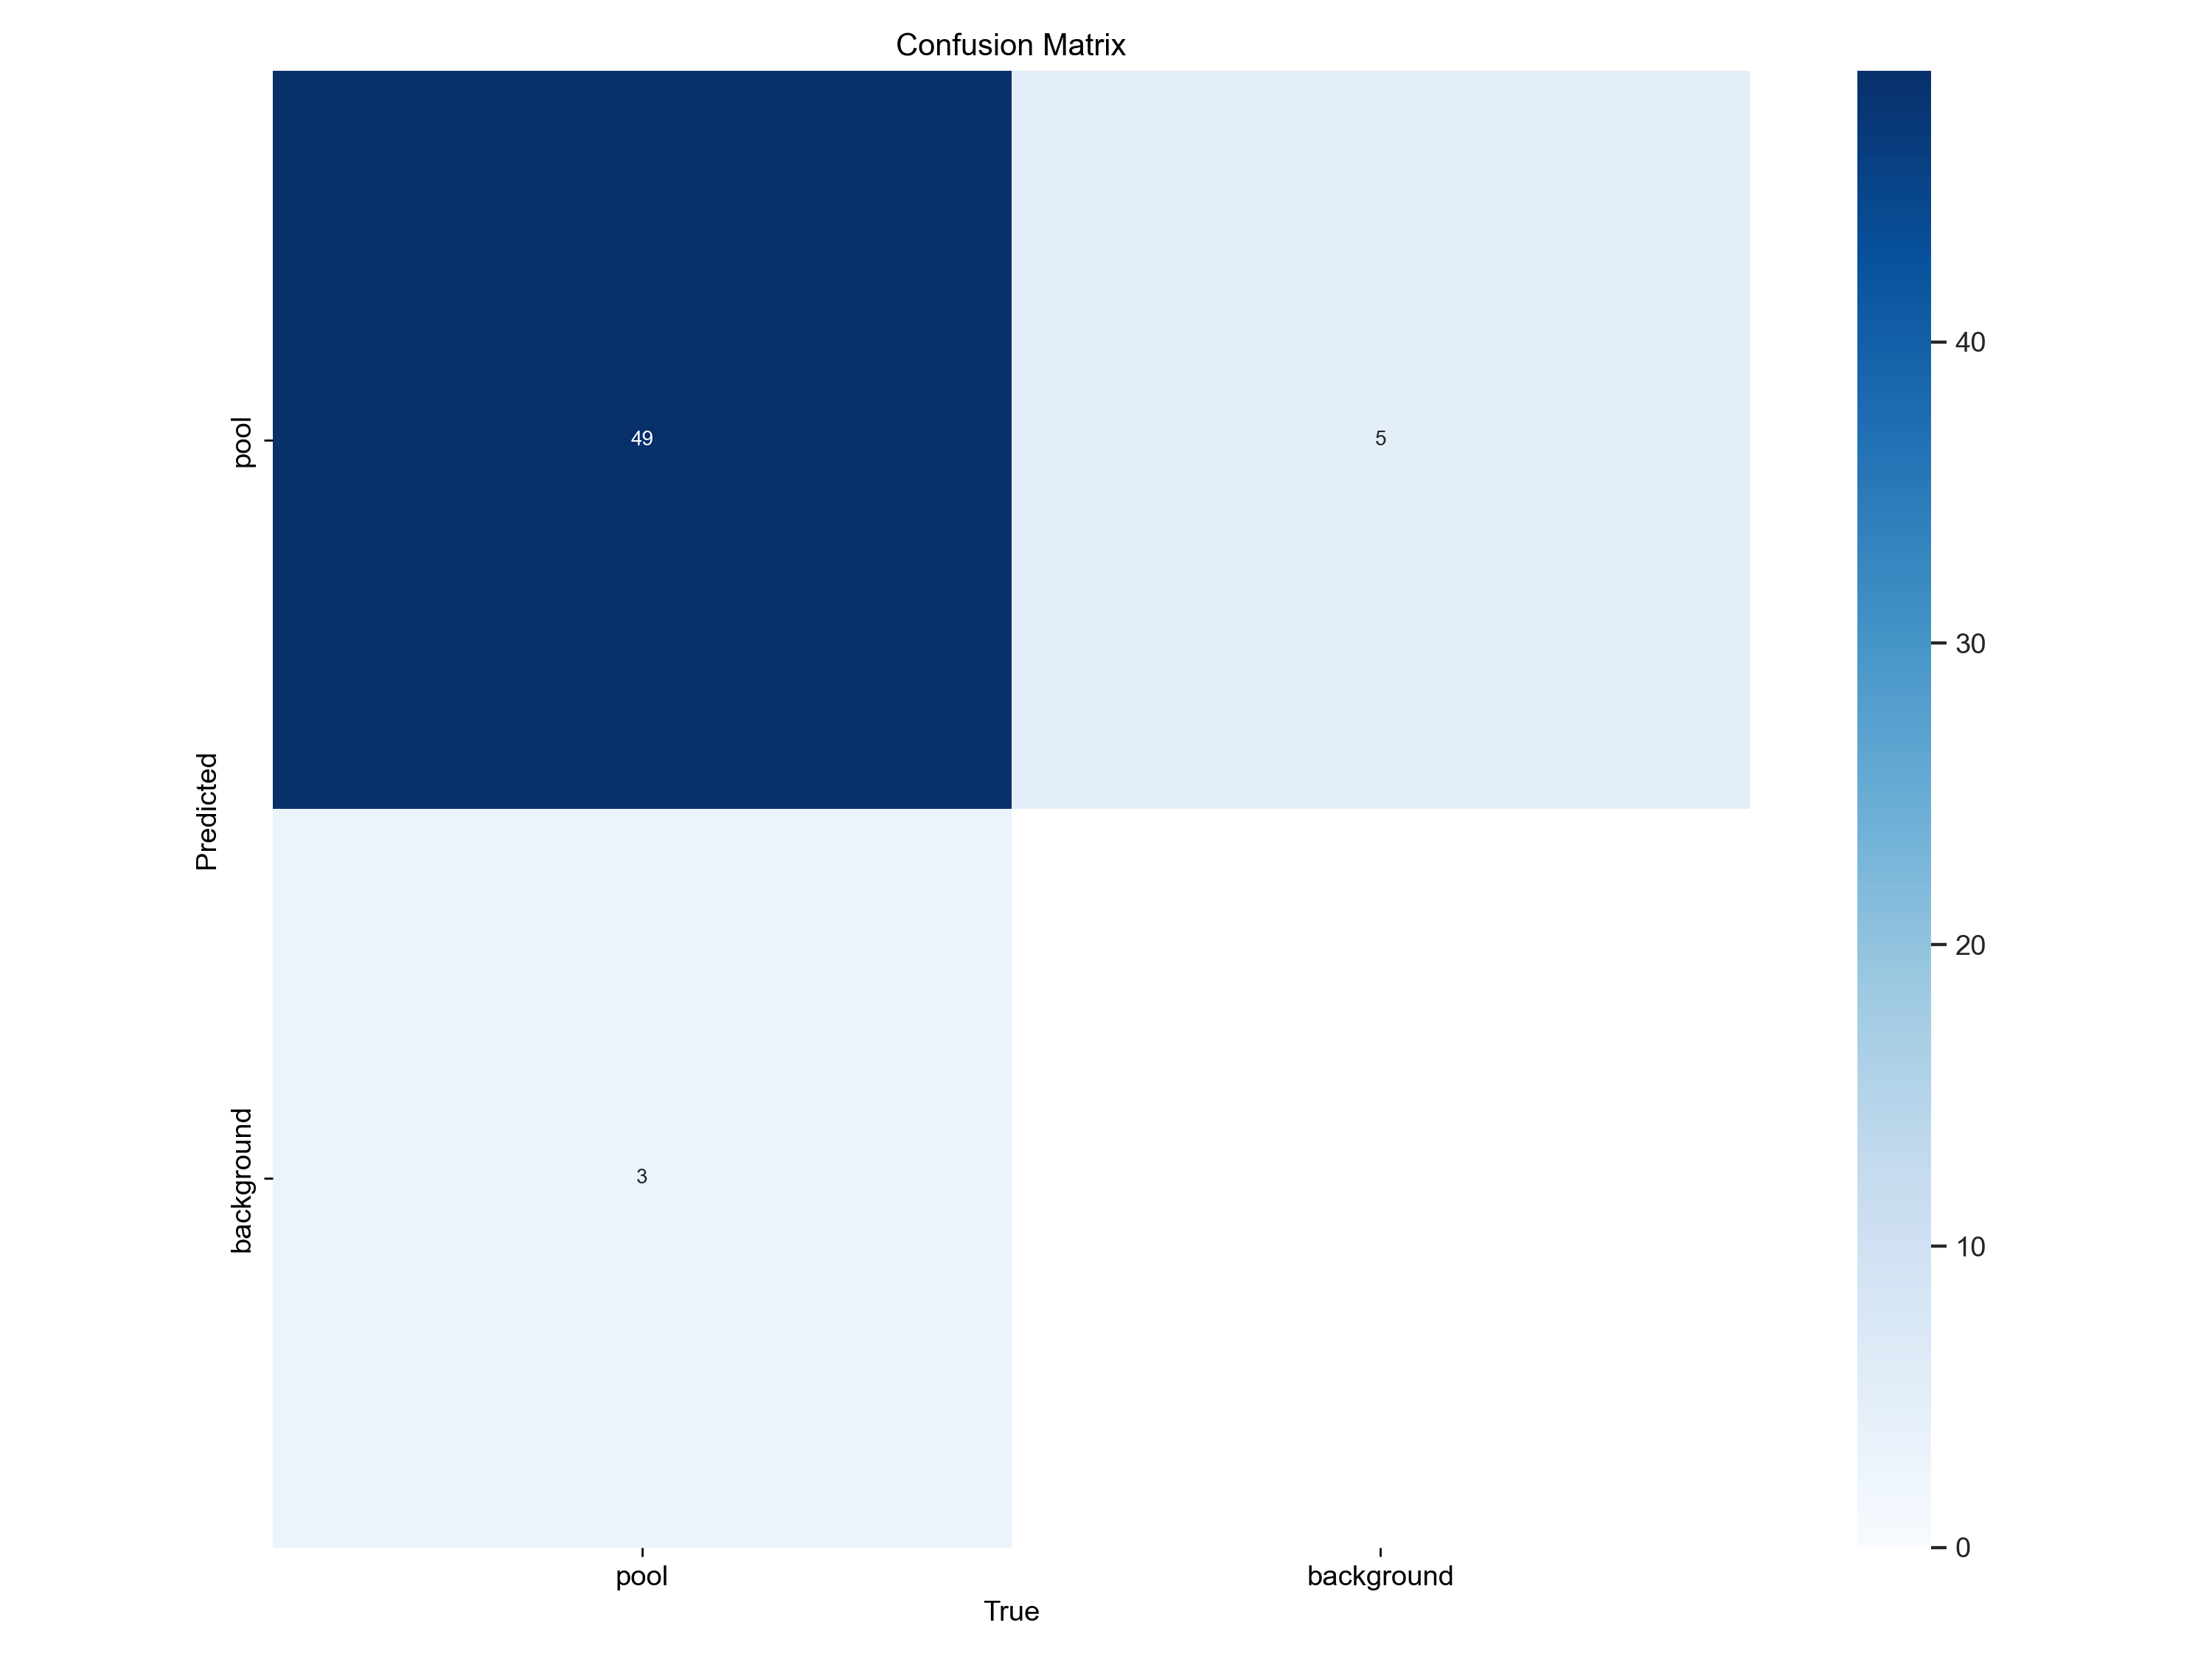

In [11]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'../models/obb/val/confusion_matrix.png', width=600)

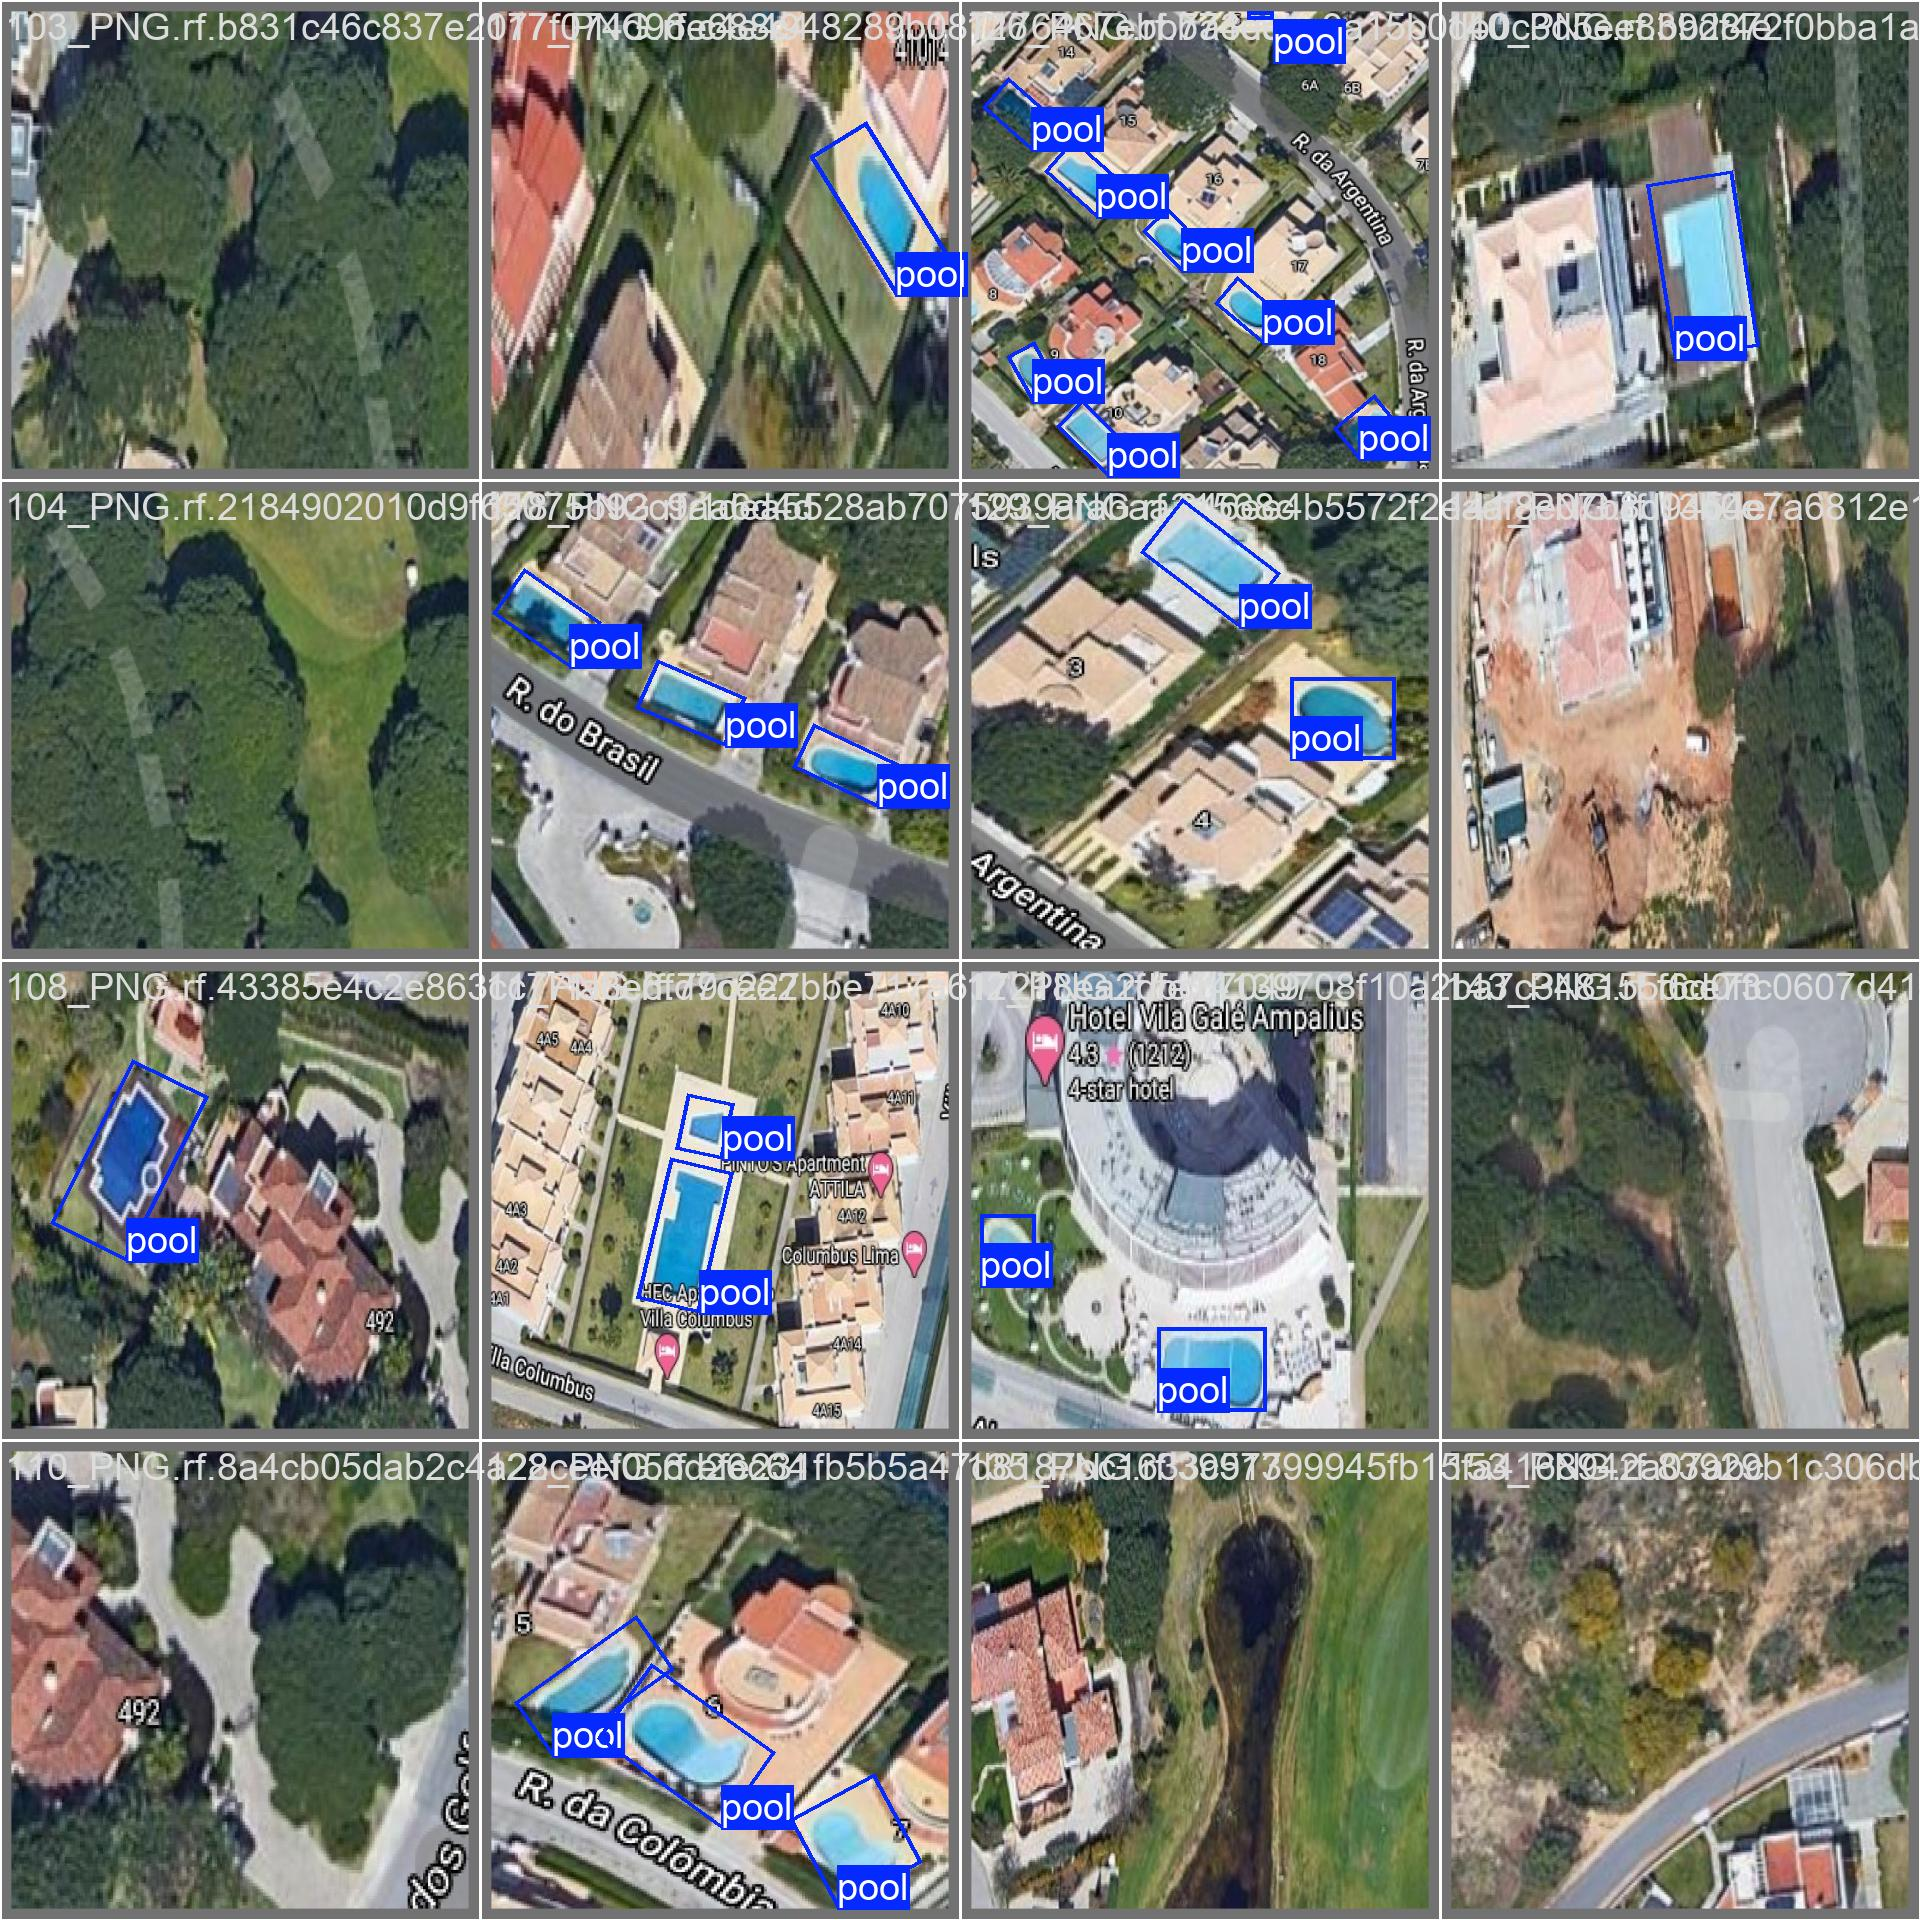

In [12]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'../models/obb/val/val_batch0_labels.jpg', width=600)

## Inference with Custom Model

In [15]:
!yolo task=detect mode=predict model=../models/obb/train/weights/best.pt conf=0.5 source={dataset.location}/test/images save=True project=../models name=obb/predict

WARNING ⚠️ conflicting 'task=detect' passed with 'task=obb' model. Ignoring 'task=detect' and updating to 'task=obb' to match model.
Ultralytics 8.3.40 🚀 Python-3.9.1 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3060, 12287MiB)
YOLOv8n-obb summary (fused): 187 layers, 3,077,414 parameters, 0 gradients, 8.3 GFLOPs

image 1/29 c:\Users\SABIO\Documents\GitHub\Pool-Detection-CNN\datasets\test\images\100_PNG.rf.2fdbee788f28dd434fab0e5af1e62ebd.jpg: 640x640 9.6ms
image 2/29 c:\Users\SABIO\Documents\GitHub\Pool-Detection-CNN\datasets\test\images\109_PNG.rf.176f1f72603e36bb78b9f609978943fa.jpg: 640x640 9.6ms
image 3/29 c:\Users\SABIO\Documents\GitHub\Pool-Detection-CNN\datasets\test\images\111_PNG.rf.9b45c26604f5c59c4219cd5543aa56be.jpg: 640x640 (no detections), 10.3ms
image 4/29 c:\Users\SABIO\Documents\GitHub\Pool-Detection-CNN\datasets\test\images\127_PNG.rf.477dacd8b488d7869b12196fb550b0fe.jpg: 640x640 11.3ms
image 5/29 c:\Users\SABIO\Documents\GitHub\Pool-Detection-CNN\datasets\test\image

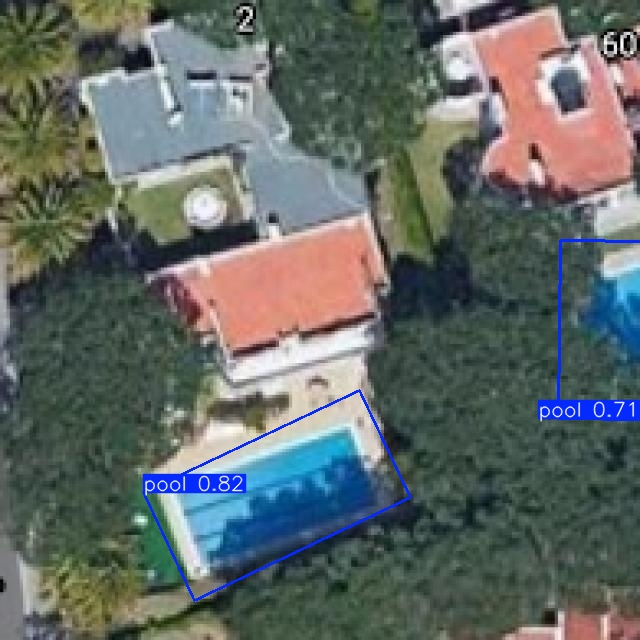

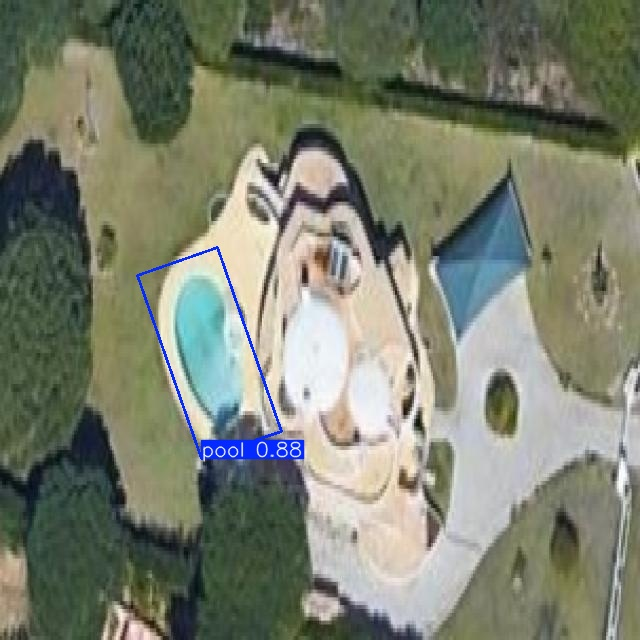

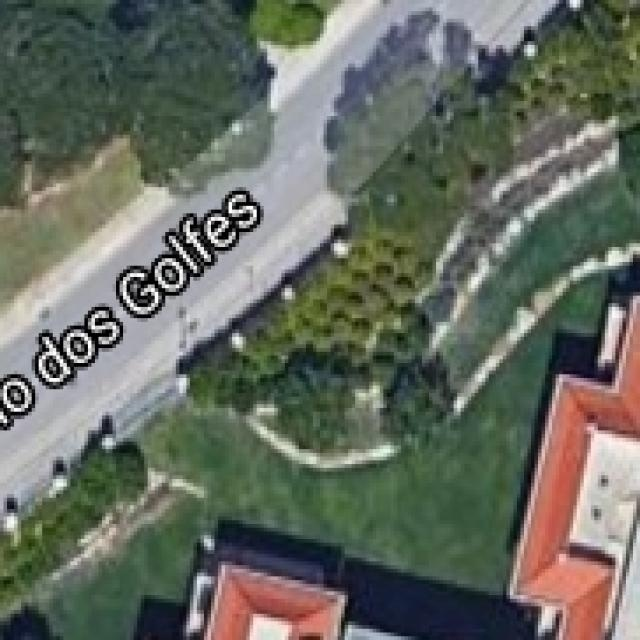

In [16]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob(f'../models/obb/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[:3]:
    display(IPyImage(filename=img, width=600))
    print("\n")

In [ ]:
!pip install supervision

In [17]:
model = YOLO('../models/obb/train/weights/best.pt')

import os
import random

random_file = random.choice(os.listdir(f"{dataset.location}/test/images"))
file_name = os.path.join(f"{dataset.location}/test/images", random_file)

results = model(file_name)

import supervision as sv
import cv2

detections = sv.Detections.from_ultralytics(results[0])

oriented_box_annotator = sv.OrientedBoxAnnotator()
annotated_frame = oriented_box_annotator.annotate(
    scene=cv2.imread(file_name),
    detections=detections
)

sv.plot_image(image=annotated_frame, size=(16, 16))


image 1/1 c:\Users\SABIO\Documents\GitHub\Pool-Detection-CNN\datasets\test\images\79_PNG.rf.cb587f88d5697c3f863da370ff863eec.jpg: 640x640 10.1ms
Speed: 1.5ms preprocess, 10.1ms inference, 4.5ms postprocess per image at shape (1, 3, 640, 640)


<Figure size 1600x1600 with 1 Axes>

## Deploy model on Roboflow

Once you have finished training your YOLOv11 model, you’ll have a set of trained weights ready for use. These weights will be in the `/runs/detect/train/weights/best.pt` folder of your project. You can upload your model weights to Roboflow Deploy to use your trained weights on our infinitely scalable infrastructure.

The `.deploy()` function in the [Roboflow pip package](https://docs.roboflow.com/python) now supports uploading YOLOv11 weights.

In [ ]:
project.version(dataset.version).deploy(model_type="yolov8-obb", model_path=f"../models/obb/train/")

Dependency ultralytics==8.0.196 is required but found version=8.3.40, to fix: `pip install ultralytics==8.0.196`
